In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import heapq
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
raw_df = pd.read_csv('data/sample_data.csv')
raw_df.set_index(['Data', 'Sigla'], inplace=True)
raw_df.head()
df = (raw_df.unstack()
          .replace({0: np.NaN})
          .fillna(method='ffill')
           .dropna(how='any', axis=1))
# df.head()


In [3]:
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
df[df.columns] = scaler.fit_transform(df[df.columns])

In [4]:
means = np.mean(df)
covariance_matrix = np.cov(df, rowvar=False)

In [5]:
def risk_profit(a):
    return np.sqrt(np.dot(np.dot(a, covariance_matrix), a)), np.sum(np.multiply(a, means))

### Função multi-objetivo
A função f tentará minimizar a variancia da carteira e maximizar o seu retorno

In [6]:
def f(x):
    return np.dot(np.dot(x, covariance_matrix), x) / np.sum(np.multiply(x, means))

In [7]:
cons = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0}]
n = df.shape[1]
x0 = np.full(n, 1 / n)
result = minimize(f, x0, constraints=cons, method='SLSQP', options={'disp': 'True', 'maxiter': 150})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.816684957979859e-06
            Iterations: 47
            Function evaluations: 2964
            Gradient evaluations: 47


### Representação visual da carteira otimizada!

risk=0.0017562202916479076, profit=0.4524647584285462


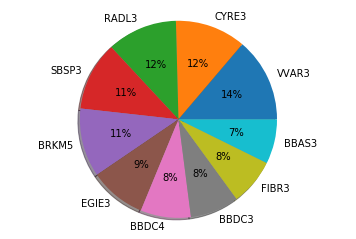

[0.19119610515973706, 0.16125004807781004, 0.1596970637139084, 0.15684283721594727, 0.1562982308310409, 0.12849573358881464, 0.1145635514911074, 0.11093384984795635, 0.10627007104633128, 0.10128862441710891]
['VVAR3', 'CYRE3', 'RADL3', 'SBSP3', 'BRKM5', 'EGIE3', 'BBDC4', 'BBDC3', 'FIBR3', 'BBAS3']


In [8]:
optimal_values = []
optimized = result.success
if optimized:
    risk, profit = risk_profit(result.x)
    print("risk=%s, profit=%s" % (risk, profit))
    optimal_values = result.x
    nlargest = heapq.nlargest(10, enumerate(optimal_values), key=lambda x: x[1])
    nlargest_indexes = [i for (i, j) in nlargest]
    nlargest_values = [j for (i, j) in nlargest]
    labels = [label for (_, label) in df.columns[nlargest_indexes].values]
    fig1, ax1 = plt.subplots()
    ax1.pie(nlargest_values, labels=labels, shadow=True, autopct='%1.0f%%')
    ax1.axis('equal')
    plt.show()
    print(nlargest_values)
    print(labels)
else:
    print('FUNCTION COULD NOT BE OPTIMIZED!')